### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

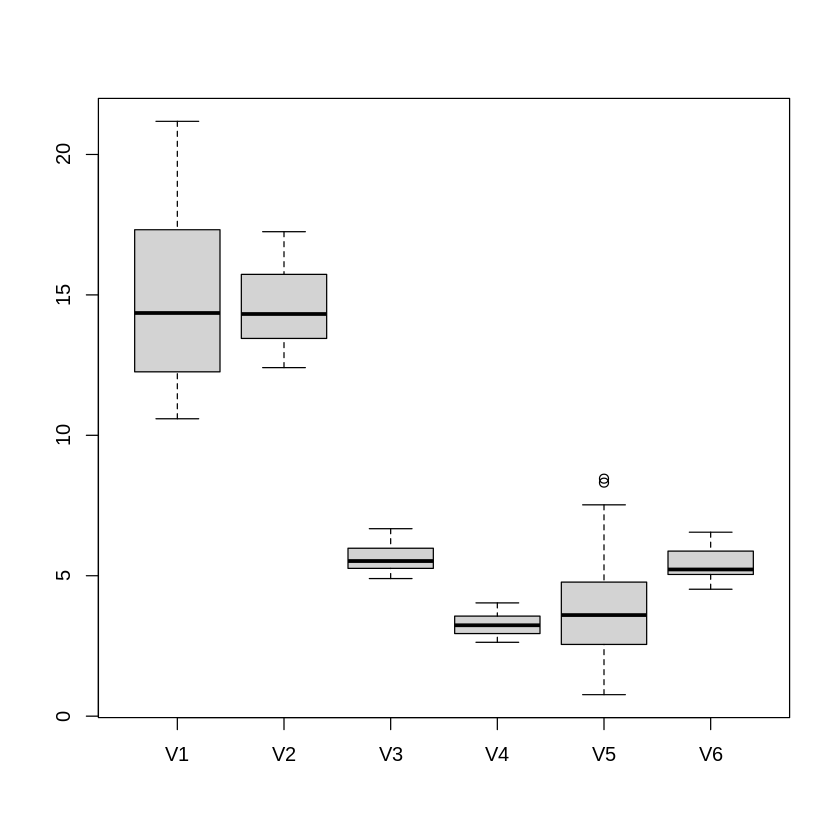

In [3]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

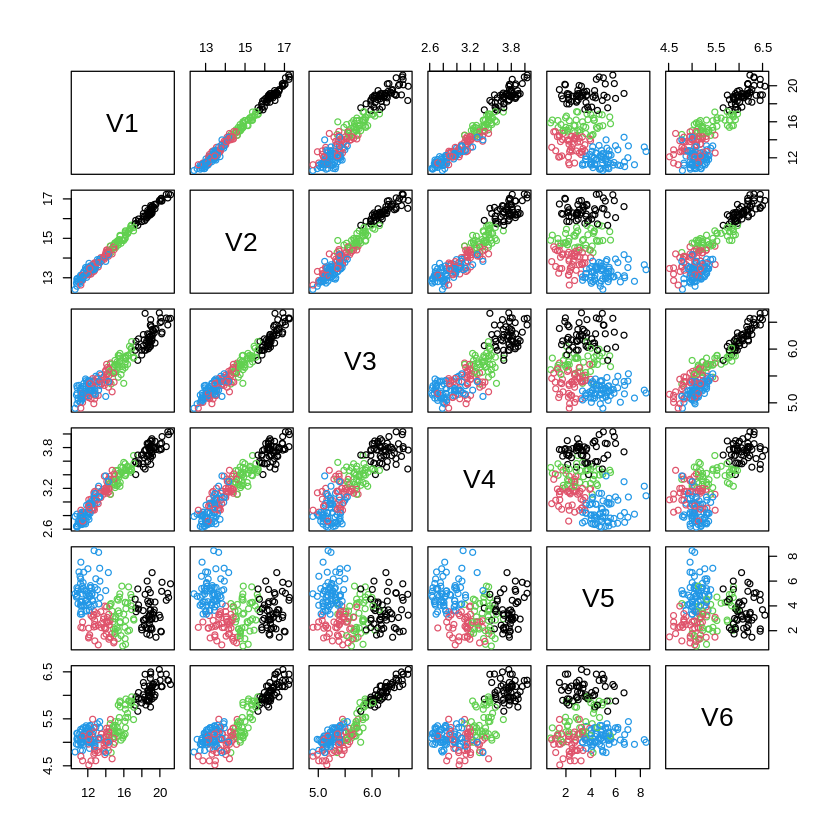

In [4]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

In [5]:
help(princomp)

princomp {stats},R Documentation
formula,"a formula with no response variable, referring only to numeric variables."
data,an optional data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector used to select rows (observations) of the data matrix x.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit."
x,a numeric matrix or data frame which provides the data for the principal components analysis.
cor,a logical value indicating whether the calculation should use the correlation matrix or the covariance matrix. (The correlation matrix can only be used if there are no constant variables.)
scores,a logical value indicating whether the score on each principal component should be calculated.
covmat,"a covariance matrix, or a covariance list as returned by cov.wt (and cov.mve or cov.mcd from package MASS). If supplied, this is used rather than the covariance matrix of x."
fix_sign,Should the signs of the loadings and scores be chosen so that the first element of each loading is non-negative?
...,arguments passed to or from other methods. If x is a formula one might specify cor or scores.



Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
V1  0.458         0.232         0.378  0.770
V2  0.460                0.231  0.611 -0.597
V3  0.450        -0.291  0.676 -0.496       
V4  0.435         0.638 -0.343 -0.485 -0.213
V5 -0.108 -0.963  0.235                     
V6  0.419 -0.248 -0.627 -0.606              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,3.0936321,-0.2499533,-0.04446158,-0.04386905,0.0115749668,0.013458399
2,-1.1731198,1.0501576,0.10256003,0.05800065,-0.0041432679,0.001410480
3,0.6362517,0.3177031,0.12251442,0.05021075,-0.0084876163,-0.025890456
4,-2.1376924,-0.7392228,-0.11677986,-0.03800567,-0.0009242843,0.005265824


K-means clustering with 4 clusters of sizes 54, 46, 44, 66

Cluster means:
        V1       V2       V3       V4       V5       V6
1 18.96296 16.39667 6.242722 3.749926 3.540333 6.100778
2 13.39109 13.86522 5.366000 3.114283 2.415804 4.990674
3 15.71909 14.97659 5.745182 3.398500 3.187045 5.448386
4 11.91439 13.26152 5.231227 2.863939 5.068288 5.105348

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   1   3   4   3   2   3   2   1   2   4   3   3   3   1   4   4   3   3   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  4   1   3   4   4   3   4   2   2   1   3   2   4   3   1   1   1   4   3   4 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   4   1   2   4   1   1   4   4   4   1   2   3   4   3   2   3   3   1   4 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   2   3   1   2   1   3   1   4   1   2   3   1   

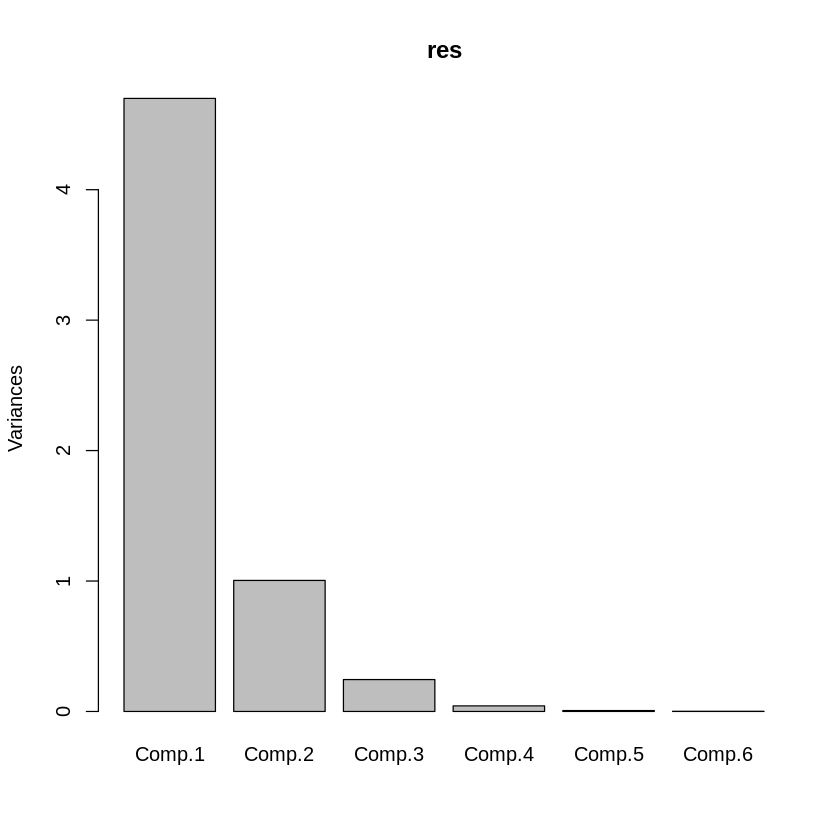

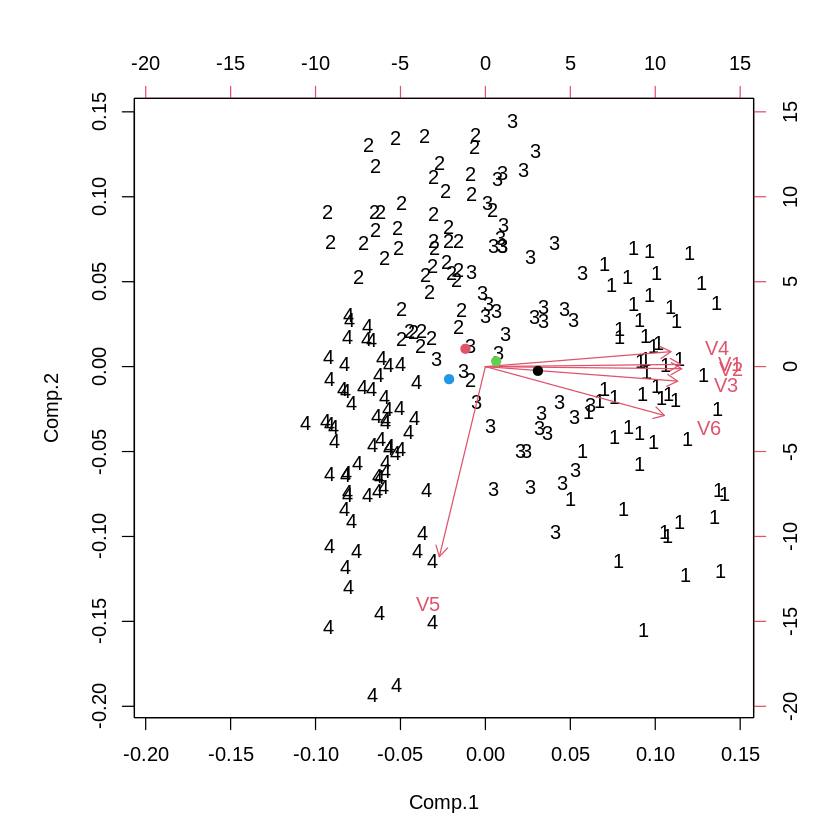

In [6]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res$loadings
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


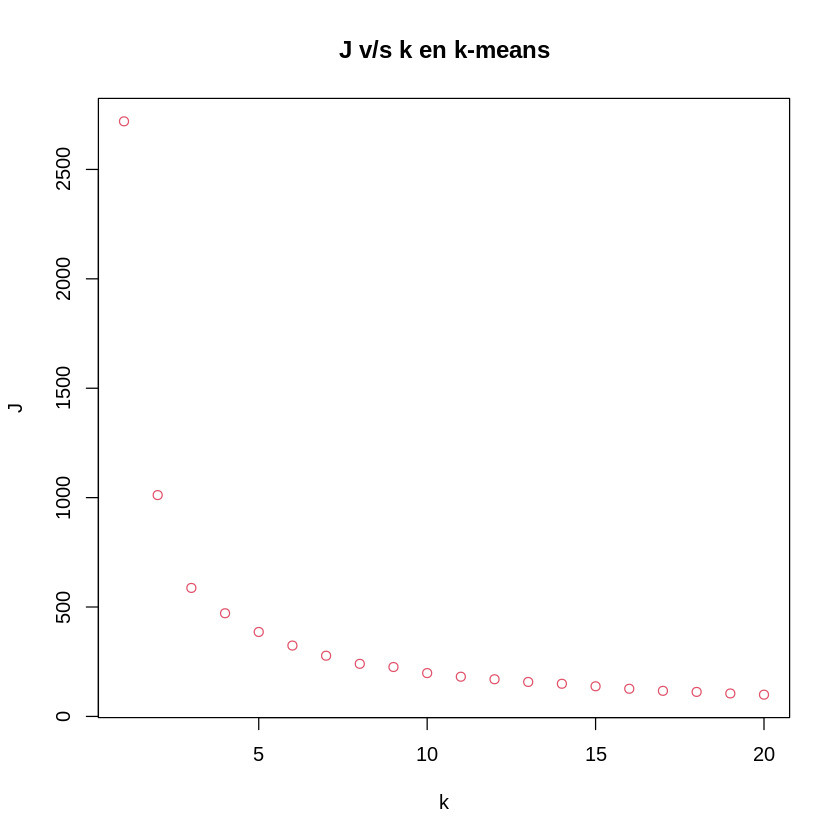

In [7]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.
2. Realice nuevamente los cálculos con el K óptimo y  caracterice los grupos obtenidos. Interprete sus resultados

### Respuesta 1.1
Para encontrar un buen valor para k, se tiene que encontrar un punto codo, en donde la diferencia entre la suma de los cuadrados de las distancias (j) sea menos pronunciada, segun lo visto en clases. Viendo el gráfico, se puede deducir que este k estaria entre el 0 y el 5, pero para confirmar esto se puede hacer lo siguiente:

In [8]:
# Calcular la diferencia con el dato anterior
diferencia <- c(0, diff(J))

# Imprimir la tabla de valores y diferencia
tablaDiferencia <- data.frame(k = 1:fin_iter, J = J, Diferencia = diferencia)
print(tablaDiferencia)

    k          J   Diferencia
1   1 2719.73687     0.000000
2   2 1011.52124 -1708.215630
3   3  587.24677  -424.274467
4   4  471.42754  -115.819231
5   5  385.97064   -85.456901
6   6  323.85146   -62.119178
7   7  277.46886   -46.382605
8   8  240.33688   -37.131975
9   9  225.70527   -14.631613
10 10  198.01647   -27.688801
11 11  181.39894   -16.617528
12 12  169.84158   -11.557361
13 13  157.43962   -12.401962
14 14  149.22887    -8.210751
15 15  137.68232   -11.546545
16 16  126.40062   -11.281704
17 17  116.85866    -9.541958
18 18  112.01241    -4.846252
19 19  104.84935    -7.163055
20 20   99.37073    -5.478623


Viendo la tabla anterior, se puede confirmar que el punto estaría entre el 0 y el 5, mas concretamente, el k sería el 3 (K = 3)

### Respuesta 1.2
1. Podemos visualizar que los grupos estás mucho mas divididos y no suelen tener muchas zonas en conjunto.
2. El agrupamiento de los datos es mucho más preciso.

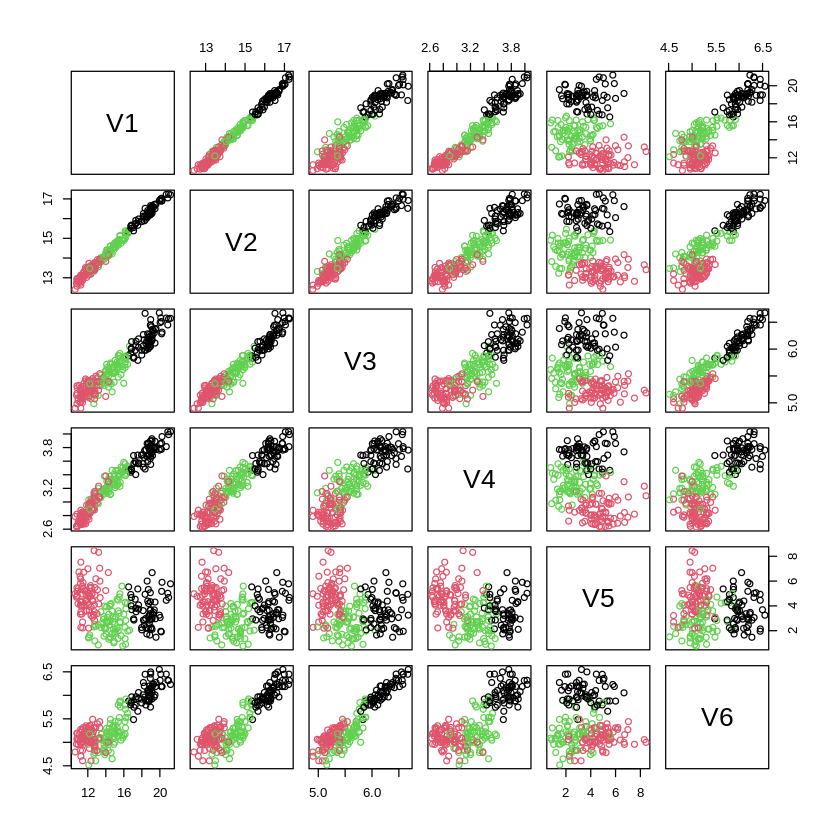

In [9]:
#ahora desarrollamos con el k apropiado 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
V1  0.458         0.232         0.378  0.770
V2  0.460                0.231  0.611 -0.597
V3  0.450        -0.291  0.676 -0.496       
V4  0.435         0.638 -0.343 -0.485 -0.213
V5 -0.108 -0.963  0.235                     
V6  0.419 -0.248 -0.627 -0.606              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,2.9205042,-0.2730151,-0.03930464,-0.04246970,0.010152392,0.007972724
2,-2.1089388,-0.5304285,-0.12243032,-0.04130075,0.002155313,0.007683248
3,-0.2189232,0.7985683,0.16423218,0.08015012,-0.010906320,-0.014971476


K-means clustering with 3 clusters of sizes 61, 77, 72

Cluster means:
        V1       V2       V3       V4       V5       V6
1 18.72180 16.29738 6.208934 3.722672 3.603590 6.066098
2 11.96442 13.27481 5.229286 2.872922 4.759740 5.088519
3 14.64847 14.46042 5.563778 3.277903 2.648931 5.192319

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   1   3   2   3   3   3   3   1   3   2   3   3   1   1   2   2   3   3   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   3   2   2   1   2   3   3   1   3   3   2   3   1   1   1   2   3   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   3   2   1   1   2   2   2   1   2   3   2   3   3   1   3   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  3   1   2   3   1   3   1   3   1   2   1   3   3   1   3   1   3   1   3   1 
 81  82  83  84  85  86  87  88  89  

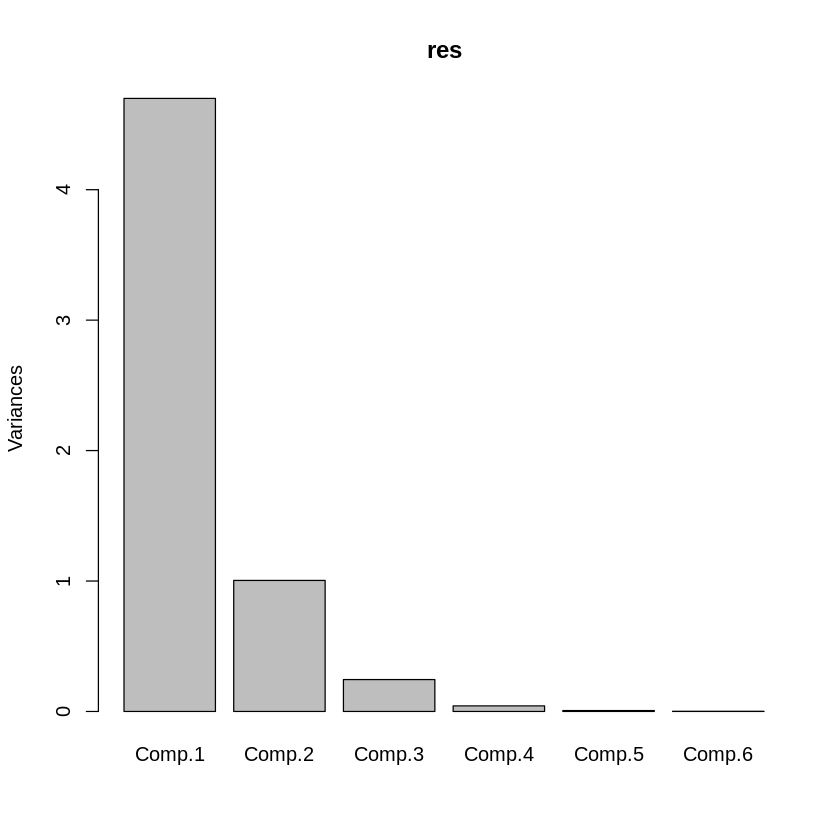

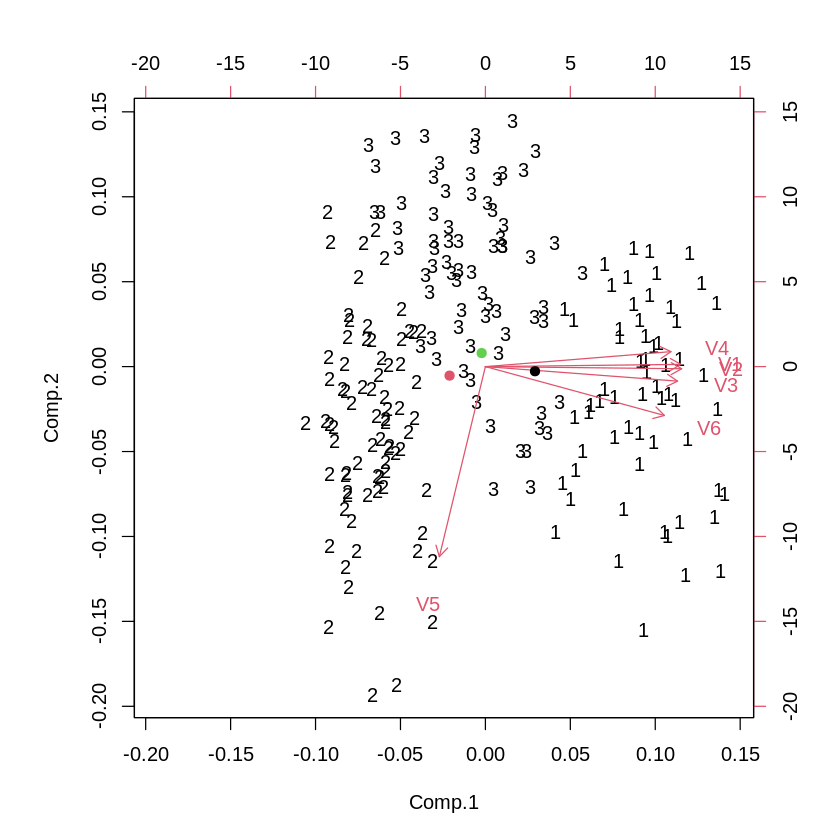

In [10]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res$loadings
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

### Respuesta 1.2
1. Podemos visualizar que los grupos estás mucho mas divididos y no suelen tener muchas zonas en conjunto, como en el grafico con K = 4.
2. En el grupo 3 se ecuentran los valores más pequeños de las variables v1, v2, v3, v4 y v6, mientras que los valores mayores de la variable v5 se encuentran aquí.
3.  En el grupo 1 se ecuentran los valores más grandes de las variables v1, v2, v3, v4 y v6, mientras que los valores medios de la variable v5 se encuentran aquí.
4. En el grupo 2 se encuentran los valores medios de las variables v1, v2, v3, v4 y v6, mientras que los valores menores de la variable v5 se encuentran aquí.

## Otras alternativas de cálculo

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



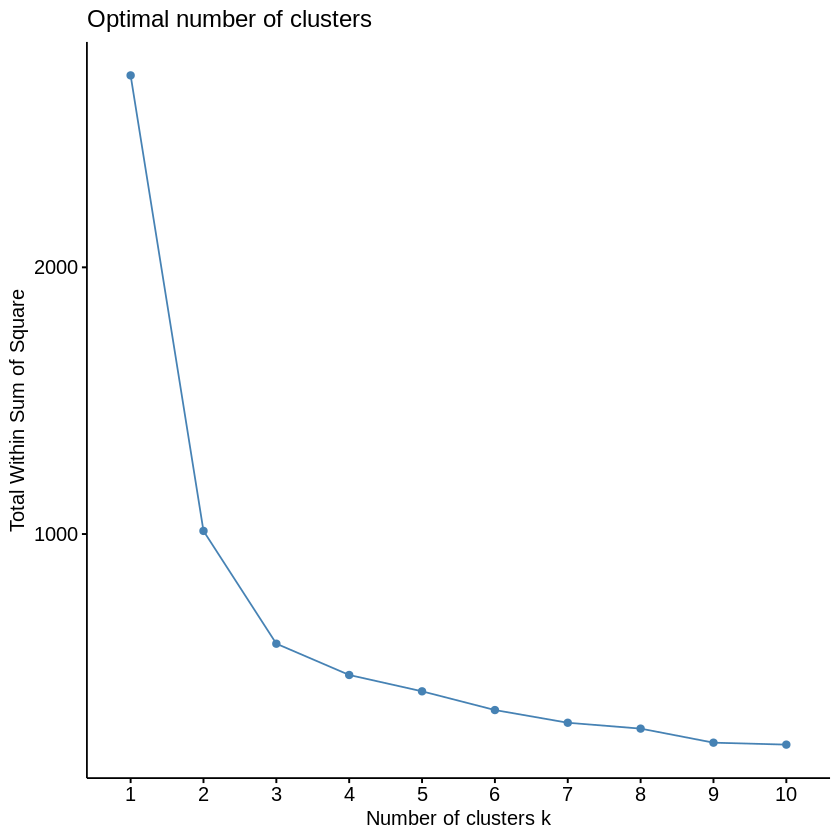

In [11]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


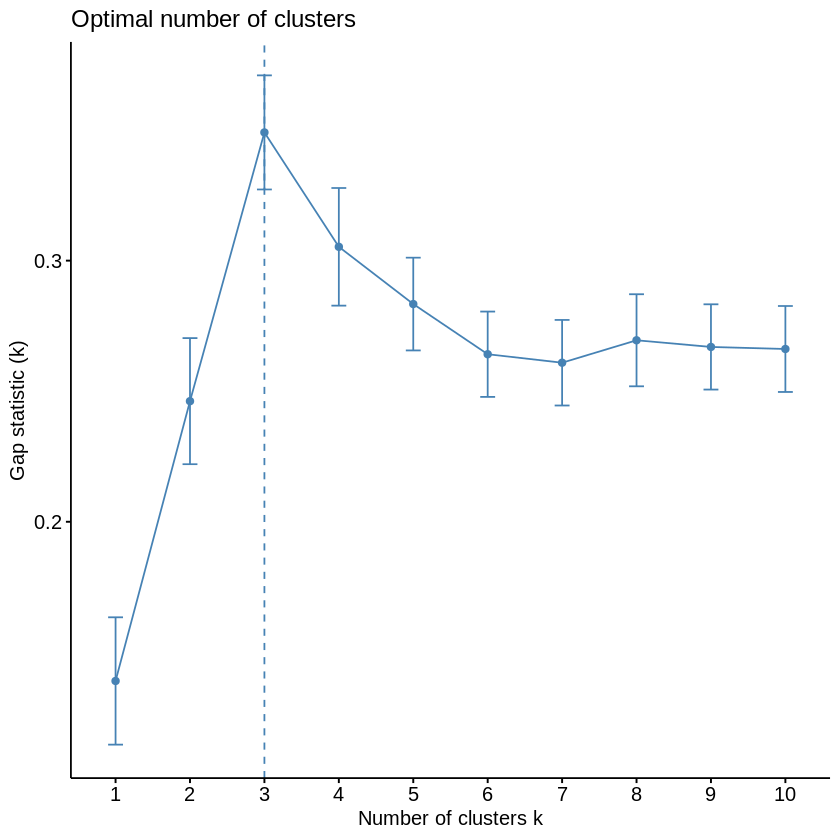

In [12]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

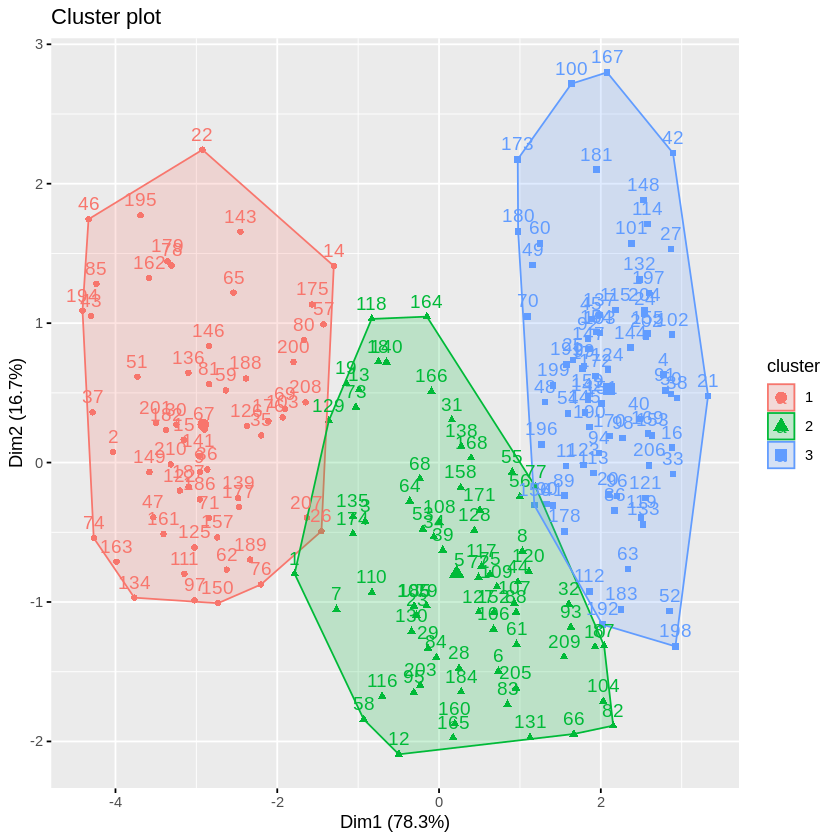

In [13]:
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con las 11 características (correspondiente a las columnas 4 a la 14)  en el archivo tiposMusica.csv. Si es necesario, filtre sus datos considerando las conclusiones del análisis exploratorio de la tarea de PCA.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [14]:
datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")

In [21]:
datosC[1:10,4:14]
summary(datosC[1:10,4:14])

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,0.942,0.350,79333,0.0761,0.00e+00,0.1560,-22.003,0.0352,140.044,0.0293
2,13,0.991,0.236,261000,0.0753,3.15e-03,0.0858,-23.232,0.0426,122.973,0.3000
3,2,0.994,0.240,48000,0.2510,9.58e-01,0.1020,-11.310,0.0394,99.234,0.1600
4,32,0.996,0.387,136293,0.0222,9.22e-01,0.1200,-29.504,0.1400,112.360,0.0687
5,29,0.994,0.358,154147,0.2050,1.45e-05,0.1490,-13.588,0.0430,87.696,0.5180
6,25,0.993,0.470,70987,0.2040,9.15e-01,0.1180,-21.667,0.0653,138.257,0.0398
7,0,0.644,0.415,64760,0.0197,0.00e+00,0.1970,-34.225,0.0369,74.338,0.2280
8,0,0.993,0.380,297372,0.0414,9.23e-01,0.1130,-22.443,0.0350,75.241,0.5470
9,23,0.993,0.332,219947,0.2300,8.72e-01,0.1110,-23.125,0.0620,99.962,0.0356


   popularity     acousticness     danceability     duration_ms    
 Min.   : 0.00   Min.   :0.6440   Min.   :0.1730   Min.   : 48000  
 1st Qu.: 4.75   1st Qu.:0.9842   1st Qu.:0.2630   1st Qu.: 73074  
 Median :15.50   Median :0.9930   Median :0.3540   Median :111347  
 Mean   :15.50   Mean   :0.9522   Mean   :0.3341   Mean   :141824  
 3rd Qu.:24.50   3rd Qu.:0.9938   3rd Qu.:0.3852   3rd Qu.:203497  
 Max.   :32.00   Max.   :0.9960   Max.   :0.4700   Max.   :297372  
     energy        instrumentalness       liveness         loudness     
 Min.   :0.01970   Min.   :0.0000000   Min.   :0.0858   Min.   :-34.23  
 1st Qu.:0.04988   1st Qu.:0.0007984   1st Qu.:0.1115   1st Qu.:-24.51  
 Median :0.08905   Median :0.4534500   Median :0.1190   Median :-22.78  
 Mean   :0.12267   Mean   :0.4628064   Mean   :0.1298   Mean   :-22.60  
 3rd Qu.:0.20475   3rd Qu.:0.9202500   3rd Qu.:0.1482   3rd Qu.:-21.75  
 Max.   :0.25100   Max.   :0.9580000   Max.   :0.1970   Max.   :-11.31  
  speechiness

### Respuesta 2.1
El subconjunto de datos extraidos de tiposMusica.csv nos entrega 11 columnas que muestran características de distintos tipos de musica. Tambien se puede ver que duration_ms, loudness y tempo estan en escalas distintas al resto que se manejan entre 0 y 1. Además según el grafíco de correlaciones realizado anteriormente en la pregunta 4 de la tarea PCA, se puede agregar que energy y loudness estan fuertemente correlacionadas de manera positiva, acercandose a un valor 1, luego las correlaciones negativas fuertes son entre accousticness y energy con un valor cercano a -1 y también esta acousticness y loudness que muestra una correlación negativa un poco menos fuerte. El resto de las variables no muestran una fuerte relación con otras variables.

Es pertinente realizar clustering si queremos identificar grupos, y como se puede ver podemos agrupar por las características de las canciones, esto se ve con los datos que nos entrega el resumen y además por la existencia de la columna genero, que nos habla de 3 grupos de musica (Clasica, Electronica y Rock).

